In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import random 

pd.set_option('float_format', '{:.6f}'.format)

In [3]:
data_path = 'cosmetics dataset/'
os.listdir(data_path)

['2019-Nov.csv', '2019-Oct.csv']

### Importing, Combining and Exploring datasets

In [4]:
def data_explore(df):
    print("Number of records and columns: ",df.shape)
    df_columns = df.columns
    num_columns = list(df.select_dtypes(include=[np.number]).columns.values)
    obj_columns = list(df.select_dtypes(include=[np.object]).columns.values)
    print("Numerical Columns: ",num_columns)
    print("Object Columns: ",obj_columns)
    print("Other datatypes: ",[i for i in df_columns if i not in num_columns+obj_columns])
    print("Null %: ",100*(df.isnull().any(axis=1).sum()/df.shape[0]))

In [5]:
# Read Sample
def read_sample(filename):
    n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
    s = 50000 #desired sample size
    skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
    df = pd.read_csv(filename, skiprows=skip)
    return df

#event_df = read_sample(data_path+'2019-Oct.csv')

In [6]:
# Read full data
oct_df = pd.read_csv(data_path+'2019-Oct.csv')
nov_df = pd.read_csv(data_path+'2019-Nov.csv')
event_df = pd.concat([oct_df,nov_df])

In [7]:
data_explore(event_df)

Number of records and columns:  (8738120, 9)
Numerical Columns:  ['product_id', 'category_id', 'price', 'user_id']
Object Columns:  ['event_time', 'event_type', 'category_code', 'brand', 'user_session']
Other datatypes:  []
Null %:  98.79565627388958


In [8]:
event_df.sample(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1516797,2019-11-11 21:16:35 UTC,remove_from_cart,5686933,1487580007046841266,NaN,NaN,5.560000,483532180,55fa0e60-9ba8-44e9-82cd-5d8e9f431e91
356773,2019-10-03 05:58:10 UTC,cart,5723489,1487580005134238553,NaN,runail,2.620000,543135252,2fac3ef9-03b0-481b-960b-09223e6abfad
3937311,2019-10-30 16:16:44 UTC,remove_from_cart,5770030,1487580013841613016,NaN,kapous,2.810000,420711754,9d222045-960a-4e64-b983-12901291c94e
1066600,2019-10-08 04:34:18 UTC,view,5809919,1602943681873052386,NaN,grattol,6.030000,494284991,bdb2b040-d207-43b3-bb7c-24901791ec40
2058388,2019-11-16 05:18:44 UTC,view,5815730,1487580005092295511,NaN,NaN,10.950000,562026733,bc89f053-2e5f-4c4d-9b95-0e6c66a85f7f


In [9]:
# price distribution
event_df[['price']].describe()

,price
count,8738120.000000
mean,8.315165
std,18.954033
min,-79.370000
25%,2.050000
50%,3.970000
75%,6.780000
max,327.780000


In [10]:
# Number of records with price < 0
event_df[['price']][event_df.price<0].count()

price    37
dtype: int64

In [11]:
# column-wise null values %
null_records = event_df.isnull().sum()
print(null_records/event_df.shape[0]*100)

event_time       0.000000
event_type       0.000000
product_id       0.000000
category_id      0.000000
category_code   98.360917
brand           41.717097
price            0.000000
user_id          0.000000
user_session     0.016594
dtype: float64


In [12]:
# Number of user-product combinations for null sessions
user_product_df = event_df[event_df.user_session.isnull()] \
    .groupby(['user_id','product_id'])[['event_time']].first().reset_index()
user_product_df.shape[0]

984

In [13]:
# Other sessions by user-product combinations
missing_sessions = user_product_df.merge(event_df,on=['user_id','product_id'],how='inner')
missing_sessions.shape[0]
missing_sessions.head(10)

,user_id,product_id,event_time_x,event_time_y,event_type,category_id,category_code,brand,price,user_session
0,230956608,5660213,2019-11-06 15:12:02 UTC,2019-11-06 15:12:02 UTC,remove_from_cart,1487580005511725929,NaN,NaN,4.760000,NaN
1,230956608,5773401,2019-11-06 15:12:04 UTC,2019-11-06 15:12:04 UTC,remove_from_cart,1487580004857414477,NaN,lianail,1.270000,NaN
2,232953533,5864036,2019-10-20 18:35:01 UTC,2019-10-20 18:20:08 UTC,view,1487580008246412266,NaN,farmavita,12.860000,34e379c0-866d-433c-a2c5-6fc230f9d83d
3,232953533,5864036,2019-10-20 18:35:01 UTC,2019-10-20 18:35:01 UTC,cart,1487580008246412266,NaN,farmavita,12.860000,NaN
4,232953533,5864036,2019-10-20 18:35:01 UTC,2019-10-20 18:42:56 UTC,view,1487580008246412266,NaN,farmavita,12.860000,7f0acd56-0677-41e3-aab7-118cd9de8ee1
5,232953533,5864036,2019-10-20 18:35:01 UTC,2019-10-20 18:47:54 UTC,remove_from_cart,1487580008246412266,NaN,farmavita,12.860000,84027a3c-89a8-4c4c-9ed4-6c608d1270b2
6,234195672,5863841,2019-11-16 20:53:40 UTC,2019-11-16 20:53:40 UTC,remove_from_cart,1542195323827388674,NaN,missha,9.520000,NaN
7,234195672,5875317,2019-11-16 20:53:37 UTC,2019-11-16 20:53:37 UTC,cart,2029082628195353599,NaN,NaN,1.590000,NaN
8,234195672,5875317,2019-11-16 20:53:37 UTC,2019-11-17 13:47:43 UTC,remove_from_cart,2029082628195353599,NaN,NaN,1.590000,36e4359f-dd6c-dce5-2abd-d4bb950c53b3
9,235095058,5835928,2019-10-06 19:56:56 UTC,2019-10-06 19:56:56 UTC,remove_from_cart,1487580010125459512,NaN,irisk,2.780000,NaN


In [14]:
# Number of unique products
event_df[['product_id']].nunique()

product_id    45960
dtype: int64

In [15]:
# Number of unique users
event_df[['user_id']].nunique()

user_id    713100
dtype: int64

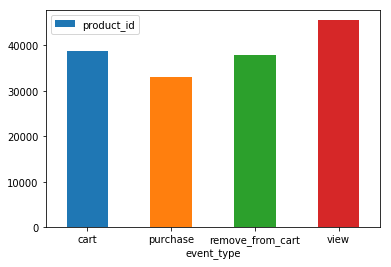

In [16]:
# Number of products for event types
event_df.groupby('event_type').product_id.nunique().reset_index().plot.bar(x='event_type',y='product_id',rot=0)

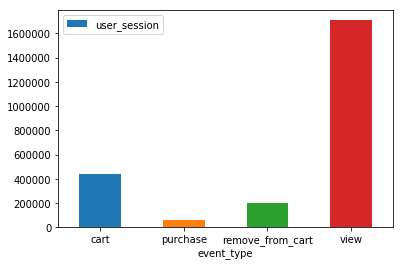

In [17]:
# Number of sessions for event types
event_df.groupby('event_type')[['user_session']].nunique().reset_index().plot.bar(x='event_type',y='user_session',rot=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B1E3C69E8>]],
      dtype=object)

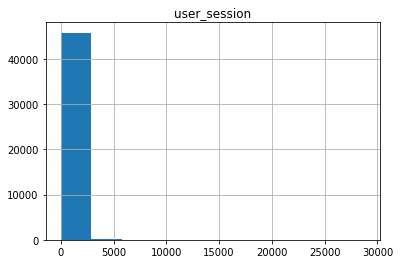

In [18]:
# Number of sessions for each product distribution - to remove products with less interactions
sess_product = event_df.groupby('product_id')[['user_session']].nunique() \
        .reset_index().sort_values(by=['user_session'],ascending=False)
sess_product[['user_session']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B1E340DD8>]],
      dtype=object)

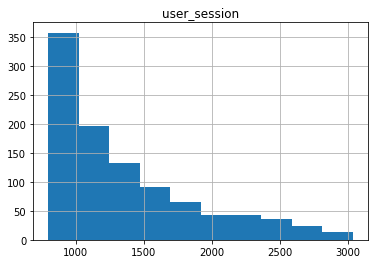

In [19]:
sess_product[['user_session']][100:1100].hist()

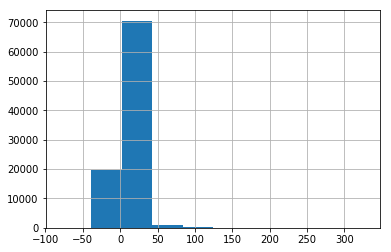

In [20]:
# product price distribution
event_df[['product_id','price']].drop_duplicates().price.hist()

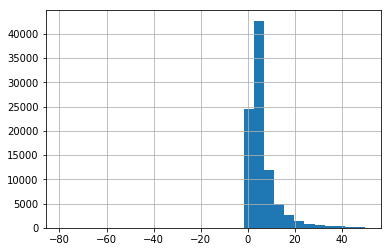

In [21]:
event_df.loc[event_df['price']<50,['product_id','price']].drop_duplicates().price.hist(bins=30)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 8.2230e+03, 1.6558e+04,
        4.4260e+03, 1.6510e+03, 8.5600e+02, 4.1500e+02, 2.4800e+02,
        1.9500e+02, 1.0800e+02, 9.8000e+01, 6.9000e+01, 7.9000e+01]),
 array([-79.37 , -75.063, -70.756, -66.449, -62.142, -57.835, -53.528,
        -49.221, -44.914, -40.607, -36.3  , -31.993, -27.686, -23.379,
        -19.072, -14.765, -10.458,  -6.151,  -1.844,   2.463,   6.77 ,
         11.077,  15.384,  19.691,  23.998,  28.305,  32.612,  36.919,
         41.226,  45.533,  49.84 ]),
 <a list of 30 Patch objects>)

C:\Users\SUBIKSHAA\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



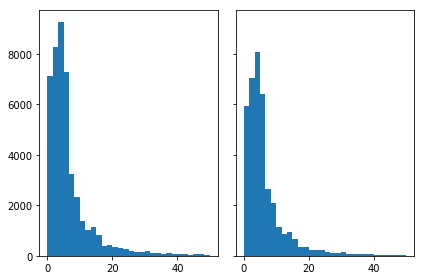

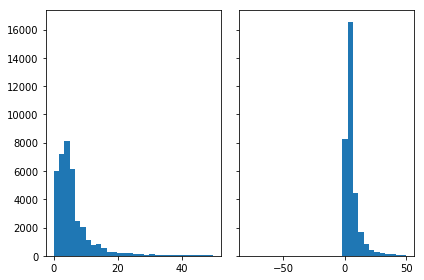

In [22]:
# Price distribution for event types - to check if price influences activity

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(event_df.loc[(event_df['event_type']=='view') & (event_df['price']<50), :].groupby('product_id').mean().reset_index()['price']
, bins=30)
axs[1].hist(event_df.loc[(event_df['event_type']=='cart') & (event_df['price']<50), :].groupby('product_id').mean().reset_index()['price']
, bins=30)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(event_df.loc[(event_df['event_type']=='remove_from_cart') & (event_df['price']<50), :].groupby('product_id').mean().reset_index()['price']
, bins=30)
axs[1].hist(event_df.loc[(event_df['event_type']=='purchase') & (event_df['price']<50), :].groupby('product_id').mean().reset_index()['price']
, bins=30)

In [25]:
# check if duplicates exist
event_df[event_df.duplicated()].shape[0]==0

False

##### Key observations
- Event time is an object -> must be converted to datetime
- Negative price value in distribution shows error in data -> can be removed
- Category code and brand columns have a lot of null values -> columns can be ignored to avoid missing data
- Negligible amount of null user-sessions present -> must be removed along with users interaction with the product
- Number of user-sessions per product is heavily skewed -> products with significant number of user sessions can be chosen for further work
- Price distributions are not different for event types
- Duplicate records exist -> must be removed